In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
# matplotlib.pyplot : stylesheet 를 변경할 수 있게 해주는 라이브러리
import seaborn as sns
import os
from scipy import stats
# scipy 패키지 : 수치 해석 기능을 제공하는 패키지
# stats 서브패키지 : 확률분보 분석을 위한 기능을 제공하는 패키지
import pandas as pd

In [2]:
import missingno as msno
# missingno 라이브러리 : 결측치/결측값을 시각화 해주는 라이브러리

In [3]:
plt.style.available
# 사용가능한 스타일 목록을 출력

['Solarize_Light2',
 '_classic_test_patch',
 '_mpl-gallery',
 '_mpl-gallery-nogrid',
 'bmh',
 'classic',
 'dark_background',
 'fast',
 'fivethirtyeight',
 'ggplot',
 'grayscale',
 'seaborn',
 'seaborn-bright',
 'seaborn-colorblind',
 'seaborn-dark',
 'seaborn-dark-palette',
 'seaborn-darkgrid',
 'seaborn-deep',
 'seaborn-muted',
 'seaborn-notebook',
 'seaborn-paper',
 'seaborn-pastel',
 'seaborn-poster',
 'seaborn-talk',
 'seaborn-ticks',
 'seaborn-white',
 'seaborn-whitegrid',
 'tableau-colorblind10']

In [4]:
plt.style.use('seaborn')
# 'seaborn' 스타일로 설정

In [5]:
import warnings
# warnings 모듈 : 경고 메시지를 출력하고 걸러내는 기능을 제공하는 모듈
warnings.filterwarnings("ignore")
# filterwarnings(action) : action값에 따라 경고를 처리한다.
# 'error' 경고를 예외로 변환한다.
# 'ignore' 경고를 무시한다.
# 'always' 항상 경고 메시지를 출력한다.
# 'default' 경고가 발생한 각 위치에 대해서 경고를 한 번씩 출력한다.
# 'module' 경고가 발생한 각 모듈에서 경고를 한 번씩 출력한다.
# 'once' 어디서 발생되었는지에 상관없이 경고를 한 번씩 출력한다.

In [6]:
df_train = pd.read_csv('data/train.csv', parse_dates=['datetime'])
df_test = pd.read_csv('data/test.csv', parse_dates=['datetime'])
# parse_dates는 날짜/시간 변수를 datetime 변수로 변환하기 위함

In [7]:
df_train.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [8]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   datetime    10886 non-null  datetime64[ns]
 1   season      10886 non-null  int64         
 2   holiday     10886 non-null  int64         
 3   workingday  10886 non-null  int64         
 4   weather     10886 non-null  int64         
 5   temp        10886 non-null  float64       
 6   atemp       10886 non-null  float64       
 7   humidity    10886 non-null  int64         
 8   windspeed   10886 non-null  float64       
 9   casual      10886 non-null  int64         
 10  registered  10886 non-null  int64         
 11  count       10886 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(8)
memory usage: 1020.6 KB


In [9]:
for col in df_train.columns:
    msperc = 'column: {:>10}\t Percent of NaN value: {:.2f}%'.format(col, 100 *(df_train[col].isnull().sum() / df_train[col].shape[0]))
    print(msperc)

column:   datetime	 Percent of NaN value: 0.00%
column:     season	 Percent of NaN value: 0.00%
column:    holiday	 Percent of NaN value: 0.00%
column: workingday	 Percent of NaN value: 0.00%
column:    weather	 Percent of NaN value: 0.00%
column:       temp	 Percent of NaN value: 0.00%
column:      atemp	 Percent of NaN value: 0.00%
column:   humidity	 Percent of NaN value: 0.00%
column:  windspeed	 Percent of NaN value: 0.00%
column:     casual	 Percent of NaN value: 0.00%
column: registered	 Percent of NaN value: 0.00%
column:      count	 Percent of NaN value: 0.00%


<AxesSubplot:>

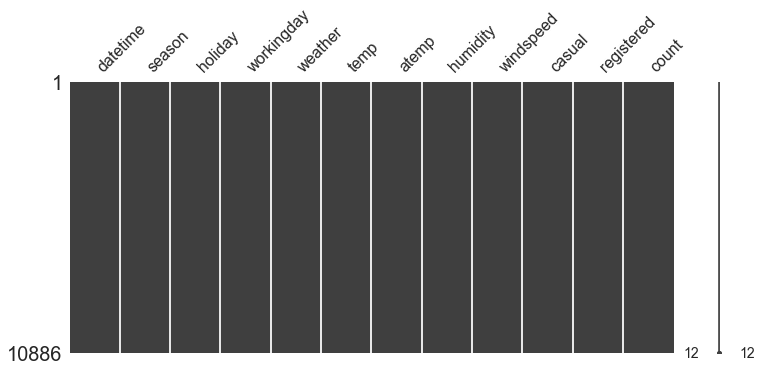

In [10]:
msno.matrix(df_train, figsize=(12, 5))
# figsize=(a, b) : a x b 만큼으로 그래프 사이즈 설정

In [11]:
# 왜도 skewness
# 분포가 정규분포에 비해서 얼마나 비대칭인지 나타내는 척도
# 왜도 값이 양수이면 평균이 정규분포보다 왼쪽으로 치우쳐져 있고 Right-skewed라고 표현
# 왜도 값이 음수이면 평균이 정규분포보다 오른쪽으로 치우쳐져 있고 Left-skewed라고 표현
# 왜도 값이 -2~2 정도의 치우침은 왜도가 크지 않다고 판단
# 절대값 3 미만이면 기준에 부합

In [12]:
# 첨도 Kurtosis
# 분포의 빈도수를 그래프로 나타내었을 때 나타나는 분포의 뾰족함
# 점수가 평균을 중심으로 가까이 몰려 있을 수록 분포의 정점은 더욱 뾰족한 모양, 즉 첨도가 커진다.
# 정규분포의 첨도는 0이며, 
# 첨도가 0보다 크면 정규분포보다 더 뾰족한 모양을 갖는 고첨이 되고
# 첨도가 0보다 작으면 분포의 높이가 정규분포보다 낮아지는 저첨이 된다.
# 첨도가 크면 이상치(outlier)가 많다.

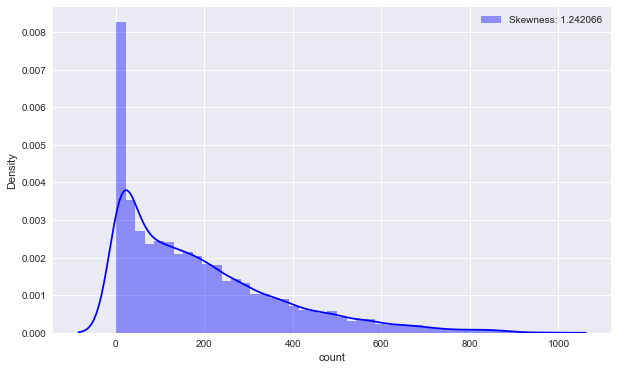

In [13]:
f, ax = plt.subplots(1, 1, figsize=(10, 6))
g = sns.distplot(df_train['count'], color='b', label="Skewness: {:2f}".format(df_train['count'].skew()), ax=ax)
g.legend(loc='best')
# 범례 설정

In [14]:
print("Skewness: %f" % df_train["count"].skew())
print("Kurtosis: %f" % df_train["count"].kurt())

Skewness: 1.242066
Kurtosis: 1.300093


In [15]:
df_train["year"] = df_train["datetime"].dt.year
df_train["month"] = df_train["datetime"].dt.month
df_train["day"] = df_train["datetime"].dt.day
df_train["hour"] = df_train["datetime"].dt.hour
df_train["minute"] = df_train["datetime"].dt.minute
df_train["second"] = df_train["datetime"].dt.second

df_test["year"] = df_test["datetime"].dt.year
df_test["month"] = df_test["datetime"].dt.month
df_test["day"] = df_test["datetime"].dt.day
df_test["hour"] = df_test["datetime"].dt.hour
df_test["minute"] = df_test["datetime"].dt.minute
df_test["second"] = df_test["datetime"].dt.second

df_train.shape

(10886, 18)

[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rental amount by hour')]

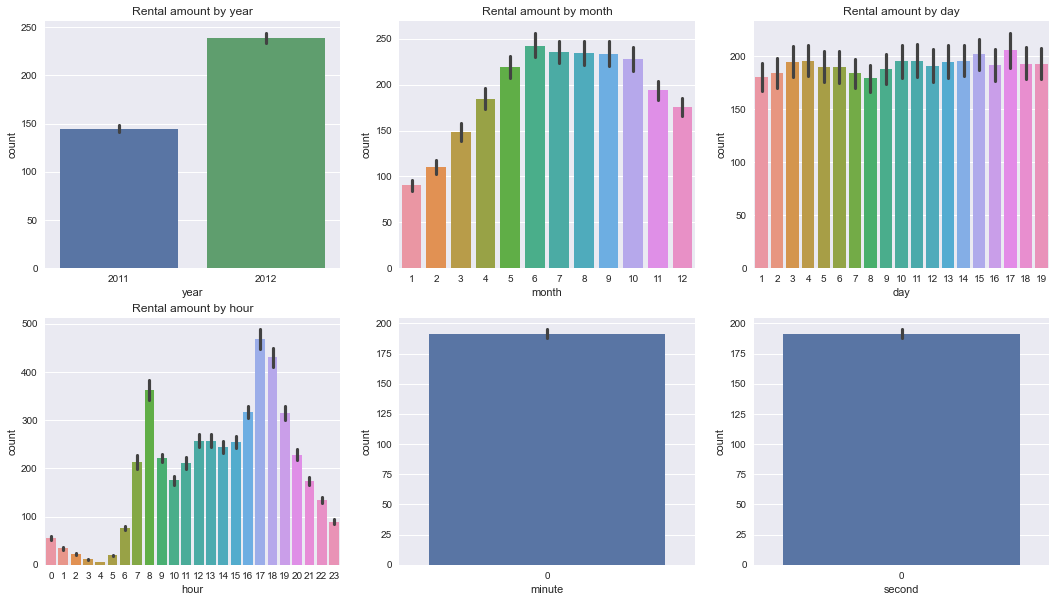

In [16]:
figure, ax = plt.subplots(nrows=2, ncols=3)
figure.set_size_inches(18, 10)

sns.barplot(data=df_train, x='year', y='count', ax=ax[0, 0])
sns.barplot(data=df_train, x='month', y='count', ax=ax[0, 1])
sns.barplot(data=df_train, x='day', y='count', ax=ax[0, 2])
sns.barplot(data=df_train, x='hour', y='count', ax=ax[1, 0])
sns.barplot(data=df_train, x='minute', y='count', ax=ax[1, 1])
sns.barplot(data=df_train, x='second', y='count', ax=ax[1, 2])

ax[0, 0].set(ylabel='count', title='Rental amount by year')
ax[0, 1].set(ylabel='count', title='Rental amount by month')
ax[0, 2].set(ylabel='count', title='Rental amount by day')
ax[1, 0].set(ylabel='count', title='Rental amount by hour')

In [17]:
df_train['dayofweek'] = df_train['datetime'].dt.dayofweek
df_test['dayofweek'] = df_test['datetime'].dt.dayofweek
df_train.shape

(10886, 19)

In [18]:
df_train['dayofweek'].value_counts()

5    1584
6    1579
3    1553
0    1551
2    1551
1    1539
4    1529
Name: dayofweek, dtype: int64

<AxesSubplot:xlabel='hour', ylabel='count'>

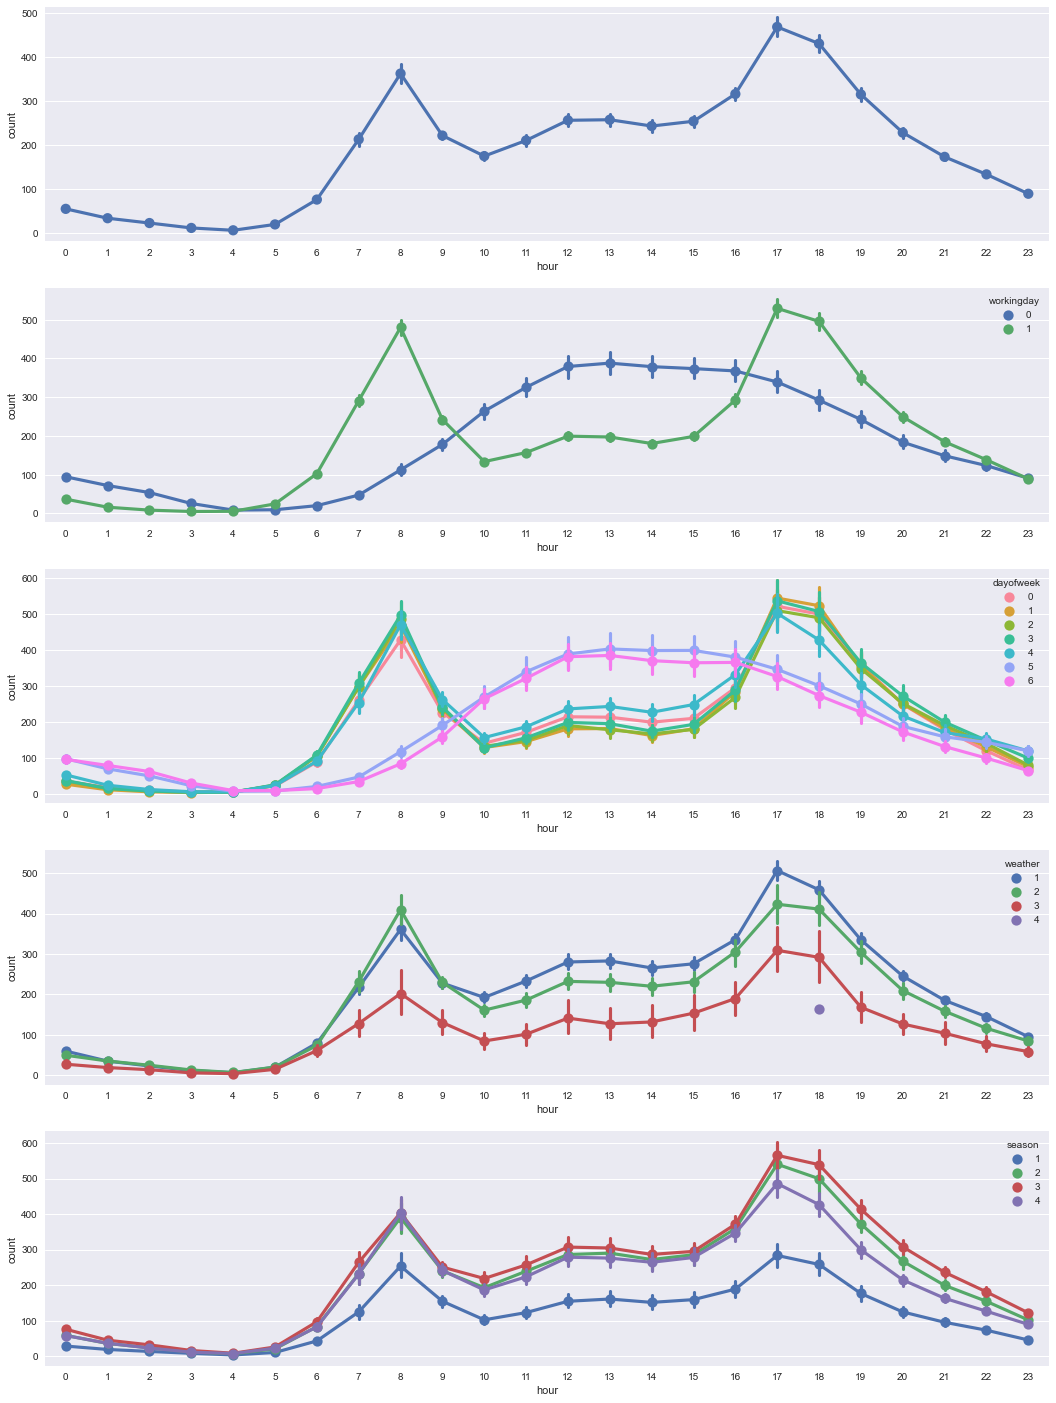

In [19]:
fig, ax = plt.subplots(nrows=5)
fig.set_size_inches(18, 25)

sns.pointplot(data=df_train, x='hour', y='count', ax=ax[0])
sns.pointplot(data=df_train, x='hour', y='count', hue='workingday', ax=ax[1])
sns.pointplot(data=df_train, x='hour', y='count', hue='dayofweek', ax=ax[2])
sns.pointplot(data=df_train, x='hour', y='count', hue='weather', ax=ax[3])
sns.pointplot(data=df_train, x='hour', y='count', hue='season', ax=ax[4])


<AxesSubplot:title={'center':'Correlation of Numeric Features with Rental Count'}>

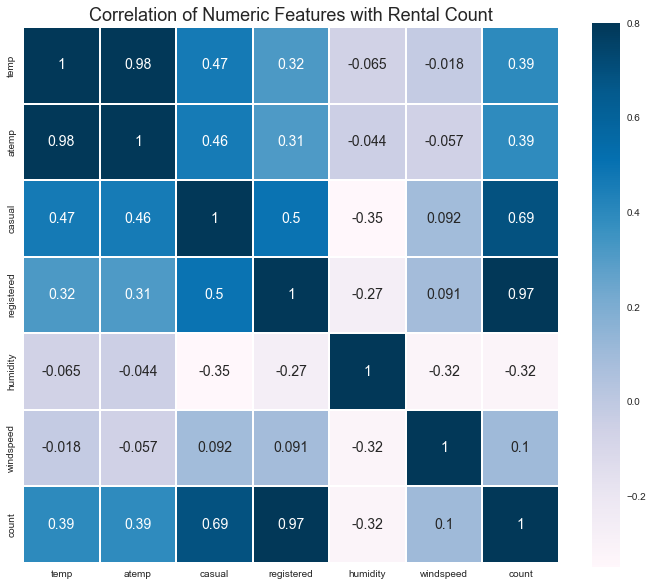

In [20]:
corr_data = df_train[['temp', 'atemp', 'casual', 'registered', 'humidity', 'windspeed', 'count']]

colormap = plt.cm.PuBu

f, ax = plt.subplots(figsize=(12,10))
plt.title('Correlation of Numeric Features with Rental Count', y=1, size=18)
sns.heatmap(corr_data.corr(), vmax=.8, linewidths=0.1, square=True, annot=True, cmap=colormap, linecolor='white', annot_kws={'size':14})

In [21]:
# 가장 눈에 띄게 진한 변수 registered 
# temp와 atemp 상관계수가 매우 높으므로 다중공선성

<AxesSubplot:xlabel='humidity', ylabel='count'>

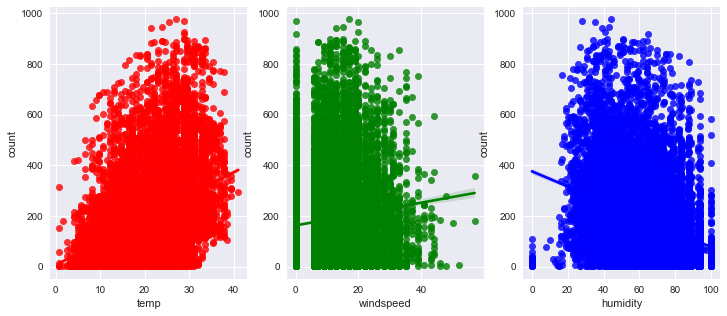

In [29]:
fig, ax = plt.subplots(ncols = 3, figsize=(12, 5))

temp_scatter_plot = pd.concat([df_train['count'], df_train['temp']], axis=1)
sns.regplot(x='temp', y='count', data=temp_scatter_plot, scatter=True, fit_reg=True, ax=ax[0], color='r')

windspeed_scatter_plot = pd.concat([df_train['count'], df_train['windspeed']], axis=1)
sns.regplot(x='windspeed', y='count', data=windspeed_scatter_plot, scatter=True, fit_reg=True,ax=ax[1], color='g')

humidity_scatter_plot = pd.concat([df_train['count'], df_train['humidity']], axis=1)
sns.regplot(x='humidity', y='count', data=humidity_scatter_plot, scatter=True, fit_reg=True, ax=ax[2], color='b')



[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'test windspeed')]

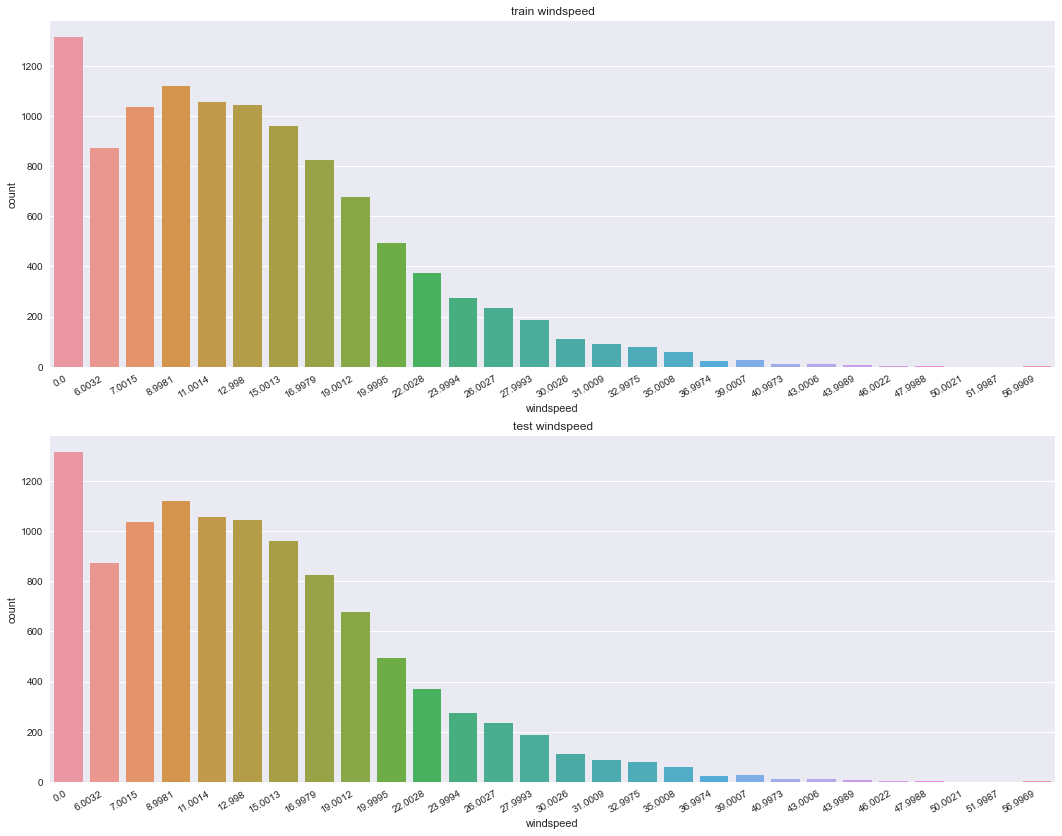

In [50]:
fig, ax = plt.subplots(nrows=2, figsize=(18, 14)) 

plt.sca(ax[0])
plt.xticks(rotation=30, ha='right')
sns.countplot(data=df_train, x='windspeed')
ax[0].set(ylabel='count', title='train windspeed')

plt.sca(ax[1])
plt.xticks(rotation=30, ha='right')
sns.countplot(data=df_train, x='windspeed')
ax[1].set(ylabel='count', title='test windspeed')

In [51]:
def concatenate_year_month(datetime):
    return "{0}-{1}".format(datetime.year, datetime.month)

df_train["year_month"] = df_train["datetime"].apply(concatenate_year_month)
df_test["year_month"] = df_test["datetime"].apply(concatenate_year_month)

df_train[['datetime', 'year_month']].head()

,datetime,year_month
0,2011-01-01 00:00:00,2011-1
1,2011-01-01 01:00:00,2011-1
2,2011-01-01 02:00:00,2011-1
3,2011-01-01 03:00:00,2011-1
4,2011-01-01 04:00:00,2011-1


<AxesSubplot:xlabel='year_month', ylabel='count'>

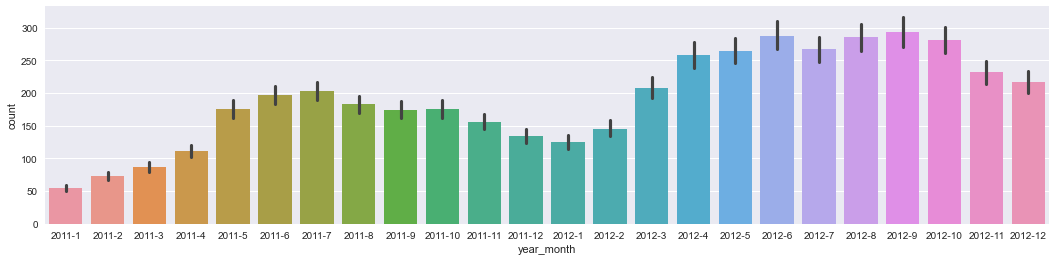

In [52]:
fig, ax = plt.subplots(figsize=(18, 4))
sns.barplot(data=df_train, y='count', x='year_month')

In [53]:
from collections import Counter

def detect_outliers(df, n, features):
    outlier_indices = []
    for col in features:
        q1 = np.percentile(df[col], 25)
        q3 = np.percentile(df[col], 75)
        IQR = q3 - q1

        outlier_step = 1.5 * IQR

        outlier_list_col = df[(df[col] < q1 - outlier_step) | (df[col] > q3 + outlier_step)].index
        outlier_indices.extend(outlier_list_col)
    outlier_indices = Counter(outlier_indices)
    multiple_outliers = list(k for k, v in outlier_indices.items() if v > n)

    return multiple_outliers

In [54]:
Outliers_to_drop = detect_outliers(df_train, 2, ["temp", "atemp", "casual", "registered", "humidity", "windspeed", "count"])

In [55]:
df_train.loc[Outliers_to_drop]

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,year,month,day,hour,minute,second,dayofweek,year_month
6658,2012-03-14 17:00:00,1,0,1,1,28.70,31.820,28,6.0032,140,642,782,2012,3,14,17,0,0,2,2012-3
6779,2012-03-19 18:00:00,1,0,1,1,26.24,31.060,57,16.9979,120,681,801,2012,3,19,18,0,0,0,2012-3
6825,2012-04-02 17:00:00,2,0,1,1,20.50,24.240,29,19.0012,128,601,729,2012,4,2,17,0,0,0,2012-4
6849,2012-04-03 17:00:00,2,0,1,1,25.42,30.305,17,12.9980,123,634,757,2012,4,3,17,0,0,1,2012-4
6850,2012-04-03 18:00:00,2,0,1,1,24.60,30.305,26,11.0014,139,661,800,2012,4,3,18,0,0,1,2012-4
6897,2012-04-05 17:00:00,2,0,1,1,20.50,24.240,31,11.0014,145,677,822,2012,4,5,17,0,0,3,2012-4
7088,2012-04-13 17:00:00,2,0,1,1,22.96,26.515,24,11.0014,117,621,738,2012,4,13,17,0,0,4,2012-4
7640,2012-05-17 17:00:00,2,0,1,1,27.06,31.060,31,8.9981,133,719,852,2012,5,17,17,0,0,3,2012-5
7641,2012-05-17 18:00:00,2,0,1,1,27.06,31.060,27,11.0014,134,734,868,2012,5,17,18,0,0,3,2012-5
7664,2012-05-18 17:00:00,2,0,1,1,27.06,31.060,34,8.9981,124,688,812,2012,5,18,17,0,0,4,2012-5


In [56]:
df_train.shape

(10886, 20)

In [57]:
df_train = df_train.drop(Outliers_to_drop, axis=0).reset_index(drop=True)

In [58]:
df_train.shape

(10846, 20)

In [59]:
df_train_num = df_train[["count", "temp", "atemp", "casual", "registered", "humidity", "windspeed"]]

for col in df_train_num:
    print('{:15}'.format(col), 
    'Skewness: {:05.2f}'.format(df_train[col].skew()),
    '    ' ,
    'Kurtosis: {:06.2f}'.format(df_train[col].kurt())
    )

count           Skewness: 01.21      Kurtosis: 001.20
temp            Skewness: 00.01      Kurtosis: -00.91
atemp           Skewness: -0.10      Kurtosis: -00.85
casual          Skewness: 02.52      Kurtosis: 007.74
registered      Skewness: 01.51      Kurtosis: 002.61
humidity        Skewness: -0.09      Kurtosis: -00.76
windspeed       Skewness: 00.58      Kurtosis: 000.63


[Text(0, 0.5, 'count'), Text(0.5, 1.0, 'Rental count by minute')]

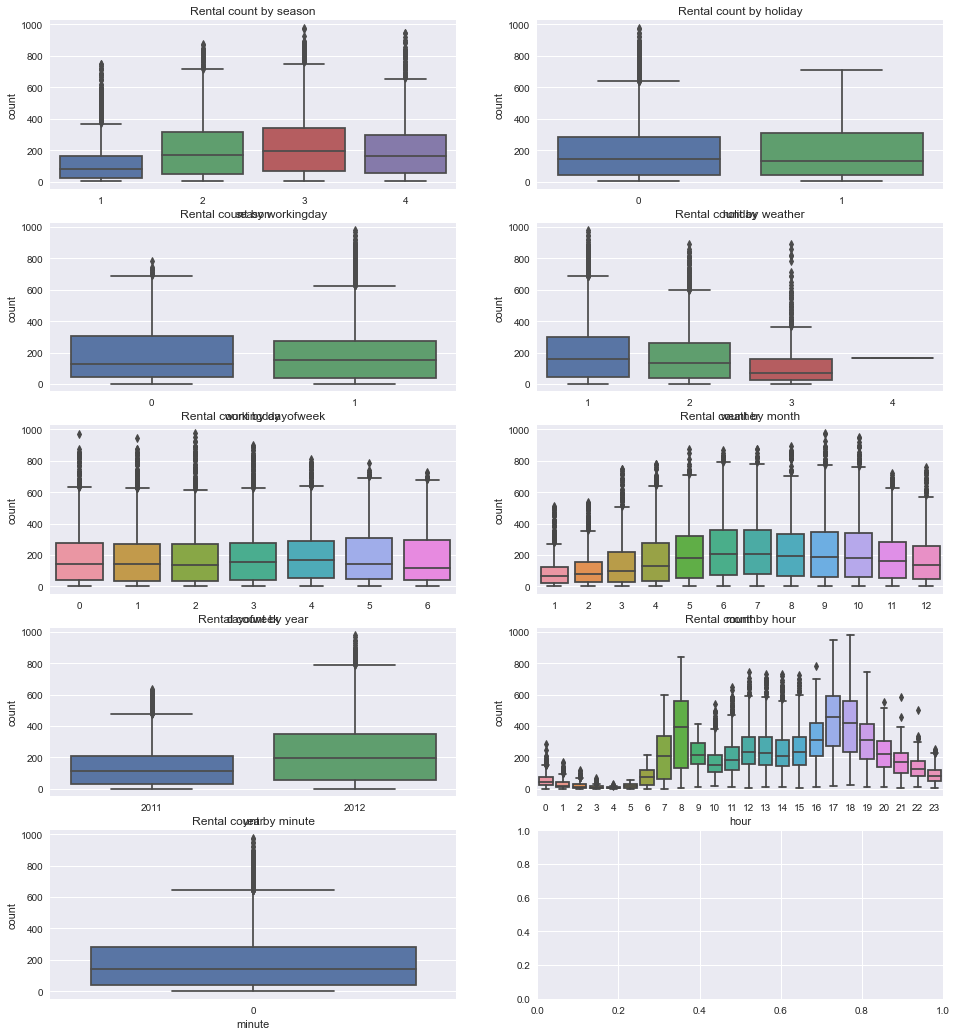

In [64]:
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(16,18))

sns.boxplot(data=df_train, y='count', x='season', orient='v', ax=ax[0][0])
sns.boxplot(data=df_train, y='count', x='holiday', orient='v', ax=ax[0][1])
sns.boxplot(data=df_train, y='count', x='workingday', orient='v', ax=ax[1][0])
sns.boxplot(data=df_train, y='count', x='weather', orient='v', ax=ax[1][1])
sns.boxplot(data=df_train, y='count', x='dayofweek', orient='v', ax=ax[2][0])
sns.boxplot(data=df_train, y='count', x='month', orient='v', ax=ax[2][1])
sns.boxplot(data=df_train, y='count', x='year', orient='v', ax=ax[3][0])
sns.boxplot(data=df_train, y='count', x='hour', orient='v', ax=ax[3][1])
sns.boxplot(data=df_train, y='count', x='minute', orient='v', ax=ax[4][0])

ax[0][0].set(ylabel = "count", title = 'Rental count by season')
ax[0][1].set(ylabel = "count", title = 'Rental count by holiday')
ax[1][0].set(ylabel = "count", title = 'Rental count by workingday')
ax[1][1].set(ylabel = "count", title = 'Rental count by weather')
ax[2][0].set(ylabel = "count", title = 'Rental count by dayofweek')
ax[2][1].set(ylabel = "count", title = 'Rental count by month')
ax[3][0].set(ylabel = "count", title = 'Rental count by year')
ax[3][1].set(ylabel = "count", title = 'Rental count by hour')
ax[4][0].set(ylabel = "count", title = 'Rental count by minute')